In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df = pd.read_excel('C:/Users/RO361326/scikit_learn_data/mldata/data.xlsx')
df.columns = [['mpg','cylinder','disp','hp','weight','acc','year','origin','name']]


In [98]:
df = df.iloc[:,:-2]
df.head()

,mpg,cylinder,disp,hp,weight,acc,year
0,15.0,8,350.0,165,3693,11.5,70
1,18.0,8,318.0,150,3436,11.0,70
2,16.0,8,304.0,150,3433,12.0,70
3,17.0,8,302.0,140,3449,10.5,70
4,15.0,8,429.0,198,4341,10.0,70


In [99]:
df= df.drop(df['hp'],axis = 1)
df = df[['mpg','acc']]

In [100]:
def compute_error(m,c,points):
    totalerror=0
    for i in range(0,len(points)):
        x = points[i,2]
        y = points[i,1]
        totalerror +=(y-(m * x + c)) ** 2
        
    return totalerror/float(len(points))

In [101]:
def step_gradient(m_curr,c_curr,points,learning_rate):
    m_grad = 0
    c_grad = 0
    n = float(len(points))
    for i in range(0,len(points)):
        x = points[i,2]
        y = points[i,1]
        m_grad += (2/n) * (y - (m_curr * x + c_curr)) * (-x)
        c_grad += (2/n) * (y - (m_curr * x + c_curr)) * (-1)
    
    m_new = m_curr - (learning_rate * m_grad)
    c_new = c_curr - (learning_rate * c_grad)
    return(m_new,c_new)

In [102]:
def gradient_iterate(m_start,c_start,points, interations, learning_rate):
    m = m_start
    c = c_start
    for i in range(interations):
        m, c=step_gradient(m,c,points,learning_rate)
        
    return (m,c)

In [103]:
points = df.reset_index().values

In [104]:
iterations = 1000
m_initial = 0
c_initial = 0
learning_rate = 0.0001

In [105]:
print("Starting gradient descent at m = {0}, c={1} and error {2}".format(m_initial,c_initial,compute_error(m_initial,c_initial,points)))

Starting gradient descent at m = 0, c=0 and error 614.6014105793452


In [106]:
[m,c] = gradient_iterate(m_initial,c_initial,points,iterations,learning_rate)
print("After {0} iterations m ={1},c={2} and error ={3}".format(iterations,m,c,compute_error(m,c,points)))

After 1000 iterations m =1.493153758578078,c=0.12255607865068387 and error =51.01343375237548


In [107]:
pred_mpg = 1.4920263083109613 * df.acc + 0.12118747836636236

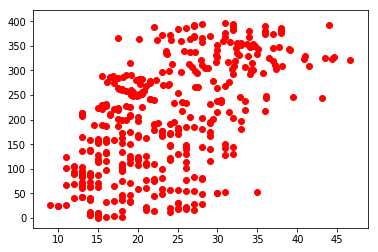

In [111]:
#plot
for i in range(0,len(points)):
    x = points[i,1]
    y = points[i,0]
    plt.scatter(x,y,color='red')
    
    #plt.plot(df.acc,(1.4920263083109613 * df.acc + 0.12118747836636236),color = 'black',linewidth=7)